# MACHINE LEARNING ALGORITHMS TEST
# -- CLUSTERING --

## 0. Starting up

### 0.1. Import Libraries

In [9]:
import pandas                          as pd
import numpy                           as np
import time
from IPython import display

#from sklearn    import datasets as ds
from sklearn    import cluster  as ct
from sklearn    import metrics  as mt
from matplotlib import pyplot   as plt


### 0.2. Load Dataset

In [2]:
MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Clusterizacao_X_dataset.csv'
df_X = pd.read_csv( MyCSV )

### 0.3. Data Structure Investigation

In [3]:
df_X.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933


In [4]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [6]:
for nome in df_X.columns.tolist():
    md = np.mean(df_X.loc[:,nome])
    sd = np.std(df_X.loc[:,nome])
    mx = np.max(df_X.loc[:,nome])
    mn = np.min(df_X.loc[:,nome])
    print( "{:<20} . . . : md={:.4f}  dp={:.4f}  max={:.4f}  min={:.4f}".format( nome, md, sd, mx, mn ) )

alcohol              . . . : md=-0.0000  dp=1.0000  max=2.2598  min=-2.4342
malic_acid           . . . : md=0.3155  dp=0.2202  max=1.0000  min=0.0000
ash                  . . . : md=-0.0000  dp=1.0000  max=3.1563  min=-3.6792
ash_alcanity         . . . : md=-0.0000  dp=1.0000  max=3.1545  min=-2.6710
magnesium            . . . : md=-0.0000  dp=1.0000  max=4.3714  min=-2.0883
total_phenols        . . . : md=0.4535  dp=0.2152  max=1.0000  min=0.0000
flavanoids           . . . : md=0.3564  dp=0.2101  max=1.0000  min=0.0000
nonflavanoid_phenols . . . : md=0.0000  dp=1.0000  max=2.4024  min=-1.8682
proanthocyanins      . . . : md=-0.0000  dp=1.0000  max=3.4851  min=-2.0690
color_intensity      . . . : md=0.0000  dp=1.0000  max=3.4354  min=-1.6343
hue                  . . . : md=0.3882  dp=0.1853  max=1.0000  min=0.0000
od280                . . . : md=0.4915  dp=0.2593  max=1.0000  min=0.0000
proline              . . . : md=0.3344  dp=0.2240  max=1.0000  min=0.0000


In [ ]:
#                   X DATASET STRUCTURE:
# alcohol              . . . : md=-0.0000  dp=1.0000  max=2.2598  min=-2.4342
# malic_acid           . . . : md= 0.3155  dp=0.2202  max=1.0000  min= 0.0000
# ash                  . . . : md=-0.0000  dp=1.0000  max=3.1563  min=-3.6792
# ash_alcanity         . . . : md=-0.0000  dp=1.0000  max=3.1545  min=-2.6710
# magnesium            . . . : md=-0.0000  dp=1.0000  max=4.3714  min=-2.0883
# total_phenols        . . . : md= 0.4535  dp=0.2152  max=1.0000  min= 0.0000
# flavanoids           . . . : md= 0.3564  dp=0.2101  max=1.0000  min= 0.0000
# nonflavanoid_phenols . . . : md= 0.0000  dp=1.0000  max=2.4024  min=-1.8682
# proanthocyanins      . . . : md=-0.0000  dp=1.0000  max=3.4851  min=-2.0690
# color_intensity      . . . : md= 0.0000  dp=1.0000  max=3.4354  min=-1.6343
# hue                  . . . : md= 0.3882  dp=0.1853  max=1.0000  min= 0.0000
# od280                . . . : md= 0.4915  dp=0.2593  max=1.0000  min= 0.0000
# proline              . . . : md= 0.3344  dp=0.2240  max=1.0000  min= 0.0000


### 0.4. Data Structure Plotting

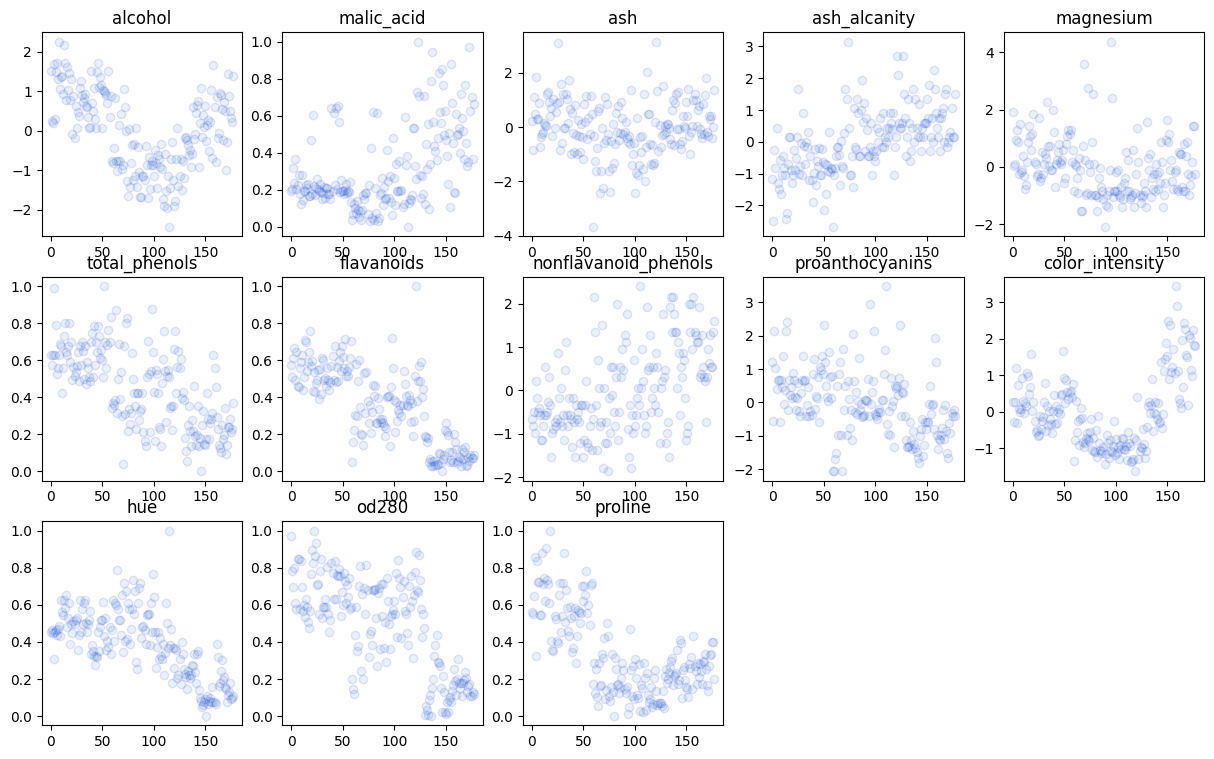

In [4]:
# PLOTANDO UMA MATRIZ DE GRÁFICOS (Ver aula 31, ciclo 4, sobre OVERFITTING)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#

plt.figure( figsize=(15, 9) )
name = df_X.columns.tolist()
for p in range( len( name ) ):
    plt.subplot( 3, 5, p+1 )
    plt.scatter( range(len(df_X)), df_X.loc[:, name[p] ], alpha=0.1, edgecolors='b' )
    plt.title( name[p] )


## 1. Algorithm: K-MEANS

### 1.1. Whole dataset: search for best Num.Clusters

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:14

n_clusters=2  - The Avg SS: 0.213219480988304
n_clusters=3  - The Avg SS: 0.2331050172234707
n_clusters=4  - The Avg SS: 0.21842784885781885
n_clusters=5  - The Avg SS: 0.18746853007839204
n_clusters=6  - The Avg SS: 0.19798526218796272
n_clusters=7  - The Avg SS: 0.21728298677207455
n_clusters=8  - The Avg SS: 0.18297094267171113
n_clusters=9  - The Avg SS: 0.1860355727345223


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:14

n_clusters=10  - The Avg SS: 0.18295061444904828
n_clusters=11  - The Avg SS: 0.17020414485132612
n_clusters=12  - The Avg SS: 0.16601342772107397
n_clusters=13  - The Avg SS: 0.16026688132564157
n_clusters=14  - The Avg SS: 0.19732331169790548
n_clusters=15  - The Avg SS: 0.16286670972394107
n_clusters=16  - The Avg SS: 0.15324205468955104
n_clusters=17  - The Avg SS: 0.17377640102783043


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:14

n_clusters=18  - The Avg SS: 0.17910341964473528
n_clusters=19  - The Avg SS: 0.15701572702163055
n_clusters=20  - The Avg SS: 0.15746865899055057
n_clusters=21  - The Avg SS: 0.15706777638901162
n_clusters=22  - The Avg SS: 0.14064644450594177
n_clusters=23  - The Avg SS: 0.14759142369196873
n_clusters=24  - The Avg SS: 0.16587270625262418
---- BEST RESULT ---
Number of Cluster=3  Silhouette=0.233105
KMeans(init='random', n_clusters=3, n_init=10, random_state=0)


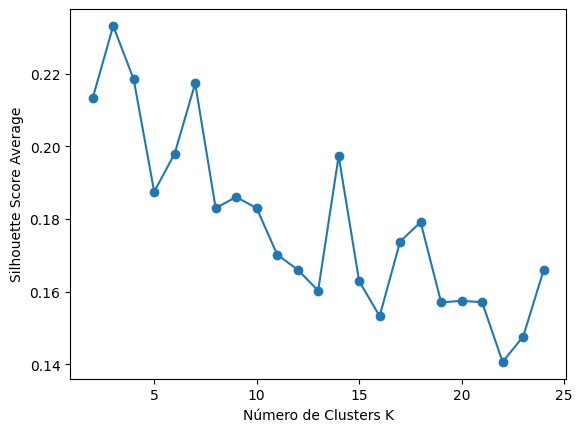

In [7]:
# SEARCH FOR BEST NUMBER OF CLUSTERS
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

n_clusters = np.arange( 2, 25, 1 )
#n_clusters = [ 8 ]
best_ss = 0
best_k = 0
best_kmeans_model = None
first_time = True
ss_list = []
for c in n_clusters:

    # define model
    kmeans = ct.KMeans( 
        n_clusters=c, 
        init='random', 
        n_init=10, 
        random_state=0
    )

    # FIT & PREDICT
    labels = kmeans.fit_predict( df_X )

    # performance (the bigger, the better)
    ss_avg = mt.silhouette_score( df_X, labels)
    ss_list.append( ss_avg )

    # Compare result
    if first_time or ss_avg > best_ss:
        first_time = False
        best_ss = ss_avg
        best_k = c
        best_kmeans_model = kmeans

    print( "n_clusters={}  - The Avg SS: {}".format( c, ss_avg ) )

print('---- BEST RESULT ---')
print("Number of Cluster={}  Silhouette={:.6f}".format(best_k, best_ss))

plt.plot( n_clusters, ss_list, marker='o' )
plt.xlabel( 'Número de Clusters K' )
plt.ylabel( 'Silhouette Score Average' )
print( best_kmeans_model )

### 1.2. Plottings

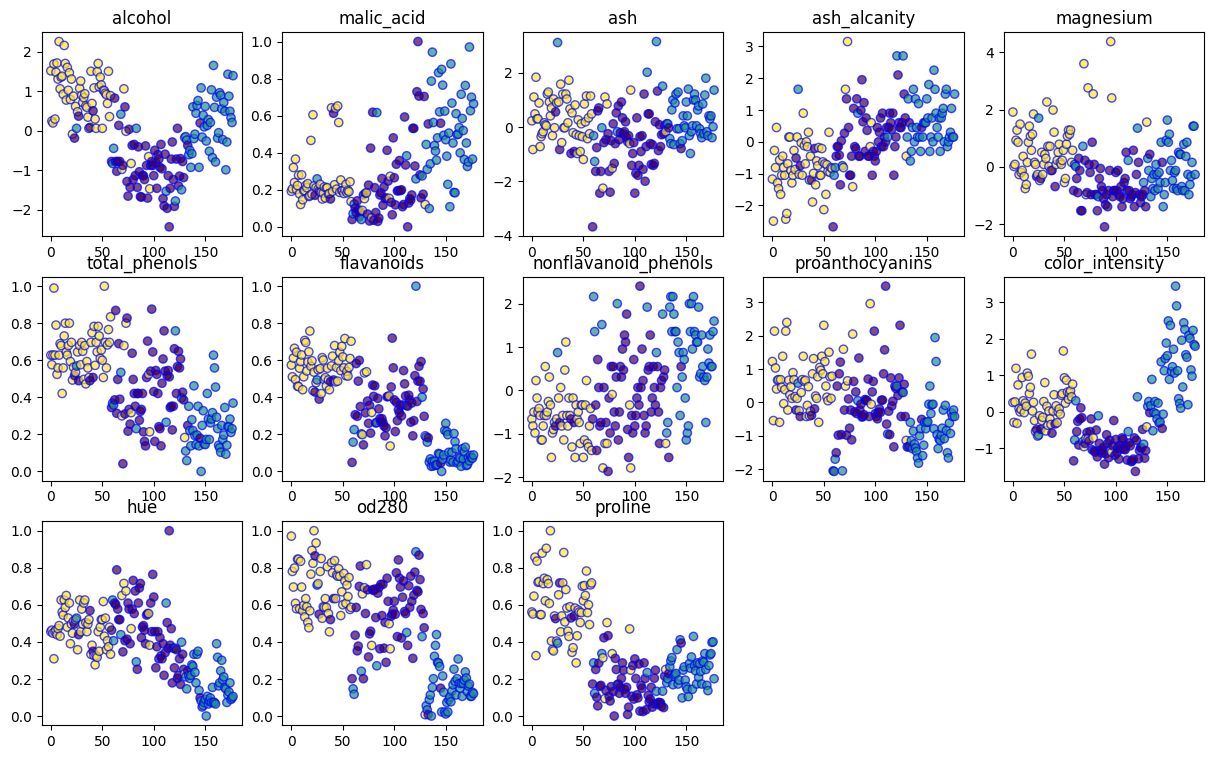

In [8]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.figure( figsize=(15, 9) )
name = df_X.columns.tolist()
for p in range( len( name ) ):
    plt.subplot( 3, 5, p+1 )
    plt.scatter( range(len(df_X)), df_X.loc[:, name[p] ], alpha=0.7, edgecolors='b', c=best_kmeans_model.labels_ )
    plt.title( name[p] )


### 1.3. Testing some clustering per features

In [3]:
df_X.columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline'],
      dtype='object')

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:14

n_clusters=2  - The Avg SS: 0.5172283078781196
n_clusters=3  - The Avg SS: 0.41225048441624706
n_clusters=4  - The Avg SS: 0.40217154961839896
n_clusters=5  - The Avg SS: 0.4183138815856233
n_clusters=6  - The Avg SS: 0.390761674361732
n_clusters=7  - The Avg SS: 0.37888043500513224
n_clusters=8  - The Avg SS: 0.37062959633316966


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:14

n_clusters=9  - The Avg SS: 0.3668876708843436
n_clusters=10  - The Avg SS: 0.364632262120572
n_clusters=11  - The Avg SS: 0.35670256685741497
n_clusters=12  - The Avg SS: 0.36639251017643837
n_clusters=13  - The Avg SS: 0.3733292605637077
n_clusters=14  - The Avg SS: 0.38036011053253593
n_clusters=15  - The Avg SS: 0.3514583405499886
n_clusters=16  - The Avg SS: 0.3853454578681078


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:14

n_clusters=17  - The Avg SS: 0.38338029596662637
n_clusters=18  - The Avg SS: 0.38681966290826403
n_clusters=19  - The Avg SS: 0.35047304592175166
n_clusters=20  - The Avg SS: 0.3997591731041246
n_clusters=21  - The Avg SS: 0.34743040765663274
n_clusters=22  - The Avg SS: 0.37347394356890795
n_clusters=23  - The Avg SS: 0.37413309683273593
n_clusters=24  - The Avg SS: 0.3652126099497333
---- BEST RESULT ---
Number of Cluster=2  Silhouette=0.517228


c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Silhouette Score Average')

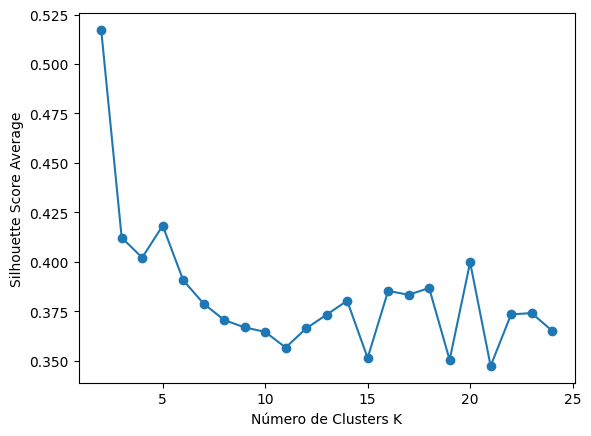

In [3]:
df2 = df_X.loc[:, ['hue','flavanoids'] ].copy()

n_clusters = np.arange( 2, 25, 1 )
best_ss = 0
best_k = 0
best_kmeans_model = None
first_time = True
ss_list = []
for c in n_clusters:

    # define model
    kmeans = ct.KMeans( 
        n_clusters=c, 
        init='random', 
        n_init=10, 
        random_state=0
    )

    # FIT & PREDICT
    labels = kmeans.fit_predict( df2 )

    # performance (the bigger, the better)
    ss_avg = mt.silhouette_score( df2, labels)
    ss_list.append( ss_avg )

    # Compare result
    if first_time or ss_avg > best_ss:
        first_time = False
        best_ss = ss_avg
        best_k = c
        best_kmeans_model = kmeans

    print( "n_clusters={}  - The Avg SS: {}".format( c, ss_avg ) )

print('---- BEST RESULT ---')
print("Number of Cluster={}  Silhouette={:.6f}".format(best_k, best_ss))

plt.plot( n_clusters, ss_list, marker='o' )
plt.xlabel( 'Número de Clusters K' )
plt.ylabel( 'Silhouette Score Average' )

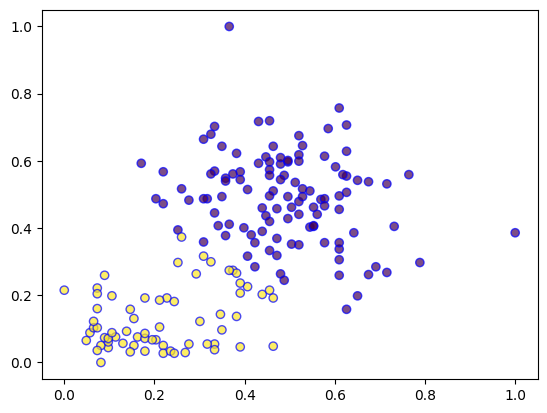

In [4]:
plt.scatter( df2.iloc[:,0], df2.iloc[:,1], alpha=0.7, edgecolors='b', c=best_kmeans_model.labels_ )

## 2. Algorithm: AFFINITY PROPAGATION

---- BEST RESULT ---
P=-47  Silhouette=0.20365750456597356
Total of 7 Unique Labels -->> [0 1 2 3 4 5 6]


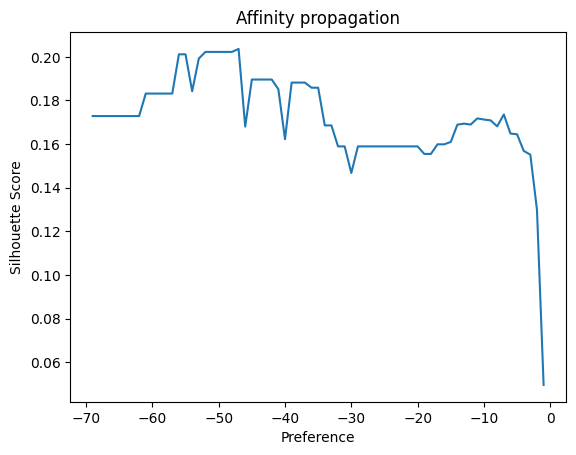

In [29]:
fig = plt.figure()
ss_list = list()
best_ss = 0
best_ap_model = None
best_ap_labels = None
best_p = 0

FirstTime = True
for i in range( len( p ) ):
    #print( 'iteração = {}'.format(p[i]) )
    # model definition
    model = ct.AffinityPropagation( preference=p[i] )

    # model training
    model.fit( df_X )

    # model performance
    labels = model.predict( df_X )

    # performance metric
    ss = mt.silhouette_score( df_X, labels )
    ss_list.append( ss )

    if FirstTime or ss > best_ss:
        best_ss = ss
        best_p = p[i]
        FirstTime = False
        best_ap_model = model
        best_ap_labels = labels

# plot
plt.plot( p[:i], ss_list[:i])
plt.title( 'Affinity propagation' )
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')

print("---- BEST RESULT ---")
print("P={}  Silhouette={}".format(best_p, best_ss))
lst = np.unique( best_ap_model.labels_ )
print("Total of {} Unique Labels -->> {}".format( len(lst), lst ))


## FIM